In [130]:
from math import pi
import matplotlib.pyplot as plt
from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now

In [131]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 40
np.random.seed(seed)

In [132]:
# t=np.random.uniform(0,1,size=50,requires_grad=False)
t = [0.0, 0.02040816326530612, 0.04081632653061224, 0.061224489795918366, 0.08163265306122448, 0.10204081632653061, 0.12244897959183673, 0.14285714285714285, 0.16326530612244897, 0.1836734693877551, 0.20408163265306123, 0.22448979591836735, 0.24489795918367346, 0.2653061224489796, 0.2857142857142857, 0.30612244897959184, 0.32653061224489793, 0.3469387755102041, 0.3673469387755102, 0.3877551020408163, 0.40816326530612246, 0.42857142857142855, 0.4489795918367347, 0.46938775510204084, 0.4897959183673469, 0.5102040816326531, 0.5306122448979592, 0.5510204081632653, 0.5714285714285714, 0.5918367346938775, 0.6122448979591837, 0.6326530612244898, 0.6530612244897959, 0.673469387755102, 0.6938775510204082, 0.7142857142857143, 0.7346938775510204, 0.7551020408163265, 0.7755102040816326, 0.7959183673469388, 0.8163265306122449, 0.8367346938775511, 0.8571428571428571, 0.8775510204081632, 0.8979591836734694, 0.9183673469387755, 0.9387755102040817, 0.9591836734693877, 0.9795918367346939, 1.0]
d_t = (t[1]-t[0])

In [133]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x):
    qml.QubitStateVector(encoded_x,wires=[0])
    qml.RY(wires=0,phi=np.pi/2)
    return qml.probs(wires=[0])

In [134]:
def encoder(x):
    vector_x = [1,x]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [135]:
def f(x):
    encoded_x,norm_x = encoder(x)
    print(qml.draw(hepler)(encoded_x))
    f_val = hepler(encoded_x)
    return f_val[1]*norm_x

In [136]:
f(-1.7)

0: ──QubitStateVector(M0)──RY(1.57)─┤  Probs
M0 = 
[ 0.50702013 -0.86193422]


tensor(0.06298201, requires_grad=True)

In [137]:
theta=np.random.uniform(0,4*pi,size=(1),requires_grad=True)
# theta=np.random.uniform(0,4*pi,size=(num_layers,num_qubits-1),requires_grad=True)

print(qml.draw(hepler)())

TypeError: hepler() missing 1 required positional argument: 'encoded_x'

In [ ]:
def cost(params):
    return 0

In [ ]:
w1=np.zeros(3,requires_grad=True)
# w2=np.zeros(3,requires_grad=True)
opt = AdamOptimizer(0.05, beta1=0.9, beta2=0.999)

In [ ]:
start=now()
print(start)

2023-09-04 16:01:16.787015


In [ ]:
epochs=100
cost_max = 10000
theta1_best = None
w1_best = None

# theta1=np.load('theta40.npy')
# w1= np.load('w40.npy')


for e in range(1,epochs+1):

    # (theta1,theta2,w1,w2,_),_cost=opt.step_and_cost(cost,theta1,theta2,w1,w2,t)
    (theta),_cost=opt.step_and_cost(cost,theta)

    if _cost<cost_max:
        cost_max = _cost
        theta_best = theta
        w1_best = w1

    # (theta,_),_cost=opt.step_and_cost(cost,theta,t)
    if e==1 or e%1==0:
        print(f'Epoch: {e} | Cost: {_cost}')



Epoch: 1 | Cost: 2.7399999999999705
Epoch: 2 | Cost: 9.66965177061274
Epoch: 3 | Cost: 43.79845422336964
Epoch: 4 | Cost: 43.08801277309183
Epoch: 5 | Cost: 26.154004963993085
Epoch: 6 | Cost: 13.919756603510889
Epoch: 7 | Cost: 8.344972068094696
Epoch: 8 | Cost: 6.172558789793954
Epoch: 9 | Cost: 5.117754365282106
Epoch: 10 | Cost: 4.316012677067381
Epoch: 11 | Cost: 3.9139562895800952
Epoch: 12 | Cost: 4.485655719363303
Epoch: 13 | Cost: 5.89501705747904
Epoch: 14 | Cost: 6.776956259019285
Epoch: 15 | Cost: 6.006165727587614
Epoch: 16 | Cost: 4.541929042368989
Epoch: 17 | Cost: 4.714241793732349
Epoch: 18 | Cost: 7.616792029059509
Epoch: 19 | Cost: 11.45426449441656
Epoch: 20 | Cost: 13.33456586145553
Epoch: 21 | Cost: 12.299852801017542
Epoch: 22 | Cost: 9.61557411577489
Epoch: 23 | Cost: 7.211088348449419
Epoch: 24 | Cost: 6.060510021674551
Epoch: 25 | Cost: 6.0827195011679285
Epoch: 26 | Cost: 7.305247622396032
Epoch: 27 | Cost: 10.043902643757123
Epoch: 28 | Cost: 13.926834376699

In [ ]:
seed =20
np.save('theta'+str(seed), theta1)
np.save('w'+str(seed),w1)

In [ ]:
y_delta_real = [-0.1, -0.08568864375010266, -0.07135199292327042, -0.05703216366155178, -0.04277533332758968, -0.028630566403092566, -0.014648393492369936, -0.0008786099410683636, 0.012629993562057113, 0.025830965225360485, 0.03868190003112095, 0.05114514907683676, 0.06318818053413534, 0.07478349631699908, 0.08590929364185632, 0.09655108128205876, 0.10669910851327256, 0.11634802541217151, 0.12549688285643618, 0.13414913252475494, 0.1423124546002818, 0.14999727816970396, 0.1572170147933966, 0.16398646160587024, 0.17032150117763253, 0.17623910151518826, 0.18175731606103976, 0.18689528211221512, 0.19167252338163385, 0.1961073022258, 0.2002172705183872, 0.2040196495808423, 0.20753123018238517, 0.21076837254000894, 0.21374700631847987, 0.2164826306303374, 0.21899031403589397, 0.22128469454323552, 0.2233792634241711, 0.22528520015009165, 0.22701309424038968, 0.22857304585789437, 0.22997466468065175, 0.2312270699019247, 0.23233889023019288, 0.23331826388915283, 0.23417283861771784, 0.2349097716700181, 0.2355355471757422, 0.23605508170803655]
y_omega_real = [38.39911, 38.40131255162024, 38.401559501400065, 38.399627615014815, 38.39535272010845, 38.38863569037213, 38.37944575798523, 38.36781828175373, 38.35385457506316, 38.33771250498817, 38.31960064799821, 38.29975795463622, 38.27844654658136, 38.25594953663366, 38.232548774138536, 38.20852344187769, 38.184133101993716, 38.15961422638989, 38.135180196730154, 38.11102130443908, 38.0873045267779, 38.0641648590319, 38.04170495996719, 38.020008128295665, 37.999139183467754, 37.979144465672405, 37.96005183583712, 37.94187079269068, 37.92460193204962, 37.90823330461032, 37.892744190413474, 37.87811073974539, 37.864305973137945, 37.851299781368624, 37.83905892546051, 37.82754703668229, 37.816724616548235, 37.80654903681822, 37.7969789305147, 37.78797953688034, 37.779515522995986, 37.77155243468513, 37.76405670589686, 37.75699565870589, 37.75033750331248, 37.744051338042496, 37.73810714934741, 37.73247581180426, 37.72712975291509, 37.7220465421391]


In [ ]:
# print(_cost)
# t=np.random.uniform(0,1,size=50,requires_grad=False)
print(t)
pred_train_X=np.array([classical_quantum_net(theta1,w1,t) for t in t])
print(pred_train_X)


[0.0, 0.02040816326530612, 0.04081632653061224, 0.061224489795918366, 0.08163265306122448, 0.10204081632653061, 0.12244897959183673, 0.14285714285714285, 0.16326530612244897, 0.1836734693877551, 0.20408163265306123, 0.22448979591836735, 0.24489795918367346, 0.2653061224489796, 0.2857142857142857, 0.30612244897959184, 0.32653061224489793, 0.3469387755102041, 0.3673469387755102, 0.3877551020408163, 0.40816326530612246, 0.42857142857142855, 0.4489795918367347, 0.46938775510204084, 0.4897959183673469, 0.5102040816326531, 0.5306122448979592, 0.5510204081632653, 0.5714285714285714, 0.5918367346938775, 0.6122448979591837, 0.6326530612244898, 0.6530612244897959, 0.673469387755102, 0.6938775510204082, 0.7142857142857143, 0.7346938775510204, 0.7551020408163265, 0.7755102040816326, 0.7959183673469388, 0.8163265306122449, 0.8367346938775511, 0.8571428571428571, 0.8775510204081632, 0.8979591836734694, 0.9183673469387755, 0.9387755102040817, 0.9591836734693877, 0.9795918367346939, 1.0]
[-0.09974539 

NameError: name 'pred_train_Y' is not defined

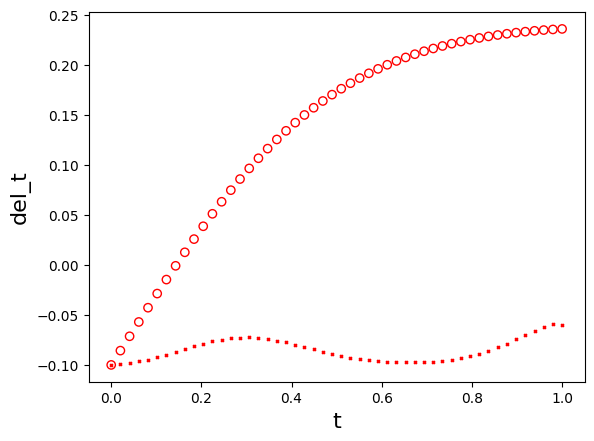

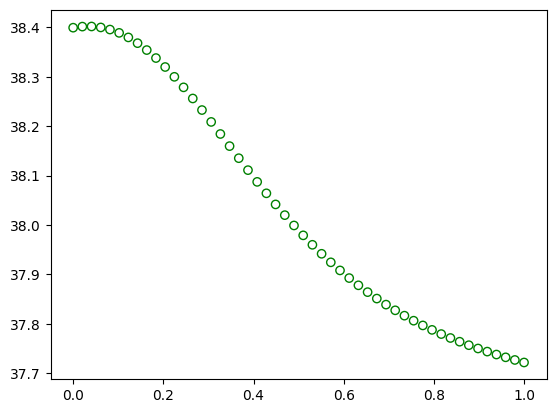

In [ ]:
plt.figure()

plt.scatter(t,y_delta_real,facecolors='none', edgecolors='r', label='True - del_t')
plt.scatter(t,pred_train_X, color='red',marker="x",s=4,label='Prediction - del_t')
plt.xlabel('t',fontsize=16)
plt.ylabel('del_t',fontsize=16)
plt.figure()
plt.scatter(t,y_omega_real,facecolors='none', edgecolors='g', label='True - omega_t')

plt.scatter(t,pred_train_Y, color='green',marker="x",s=4,label='Prediction - omega_t')

plt.xlabel('t',fontsize=16)
plt.ylabel('omega_t',fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper center',bbox_to_anchor=(0.5,1.18),ncol=2,fontsize=16)
# plt.savefig('1_measurement2_train.png')
plt.show()